## DON"T RUN IF ON COLAB OR CHANGE jit_compile= False
## And change run time to GPU

In [ ]:

import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [ ]:
from __future__ import print_function
import random, numpy as np
import keras, tensorflow as tf

from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
%matplotlib inline

## dataloader

```python
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
```

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [ ]:
y_train[1]

array([9], dtype=uint8)

#### list ชื่อ class names ไว้ก่อนเดียวไว้ใช้ในการ evaluate

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#### เปลี่ยนจาก index เป็น one-hot encoding

In [ ]:
# one hot
num_class = 10
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [ ]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

#### เปลี่ยน Datatype เป็น float32 แล้วหาร 255 เพื่อให้ข้อมูลอยู่ในช่วง 0 - 1

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## Training section

#### ต่อ NN ตามต้องการ

In [ ]:
model = Sequential([
  # feature
  Input(shape=(32,32,3)), # Input layer ถ้าไม่อยากใส่ input shape ใน CNN หรือ ต้องกสน
  Conv2D(filters=40,kernel_size=(5,5),strides=(2, 2),padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64,(5, 5), strides=(2, 2), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  # FC
  Dense(120, activation='relu'),
  Dense(120, activation='relu'),
  Dense(num_class, activation='softmax')
])

#### ตรวจสอบ param ก่อนการ train

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 40)          │           3,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 40)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          64,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │           7,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          14,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,634 (354.04 KB)

 Trainable params: 90,634 (354.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
def set_seed(seed_value=1234):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

tf.config.list_physical_devices('GPU')

set_seed(426969)

#### compile all layer with loss

```python
Model.compile(
    optimizer="name", # or keras.optimizers.nameofoptimizer(learning_rate=6969),
    loss="name",
    metrics=['accuracy'] , #something you want
    jit_compile="auto", # or False if you turn on TF_DETERMINISTIC_OPS = 1
)
```

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### train

```python
histoy = Model.fit(
    x=X_train,
    y=y_train,
    batch_size= 6969,
    validation_split= (0-1),
    validation_data= (X_valid, y_valid),
    epochs=20,
    shuffle=True,
)
```

In [ ]:
history = model.fit(x=X_train,
                            y=y_train,
                            batch_size=32,
                            epochs=20,
                            validation_data = (X_test, y_test),
                            shuffle=True,
                            verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3056 - loss: 1.8501 - val_accuracy: 0.4941 - val_loss: 1.3682
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.4937 - loss: 1.3831 - val_accuracy: 0.5465 - val_loss: 1.2680
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5517 - loss: 1.2420 - val_accuracy: 0.5714 - val_loss: 1.2006
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5886 - loss: 1.1468 - val_accuracy: 0.5893 - val_loss: 1.1645
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6153 - loss: 1.0775 - val_accuracy: 0.5906 - val_loss: 1.1483
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6350 - loss: 1.0288 - val_accuracy: 0.6021 - val_loss: 1.1170
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6513 - loss: 0.9857 - val_accuracy: 0.6079 - val_loss: 1.1111
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6626 - loss: 0.9494 

## Model Evaluation

### predict

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


เปลี่ยนจาก nd เป็น 1d

In [ ]:
y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_1d[1]

8

In [ ]:
y_test_1d[1]

8

### Confusion matrix

#### วิธีใช้ :

* var = confusion_matrix(y_true, y_pred)
* display = ConfusionMatrixDisplay(confusion_matrix, label_class=class_names)

display :

* display.plot() ใส่ลงใน matplot
* plt.show()

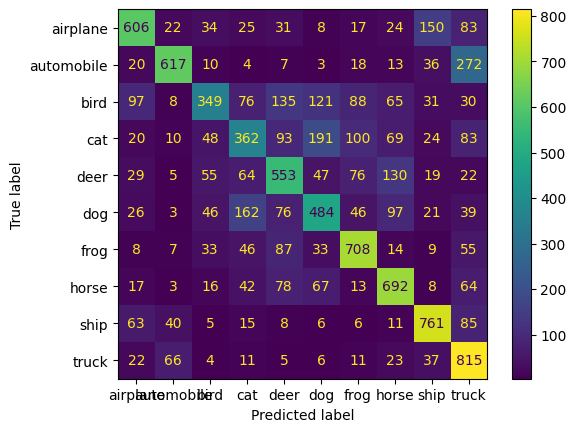

In [ ]:
cm = confusion_matrix(y_true = y_test_1d, y_pred=y_pred_1d)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
display.plot()
plt.show()

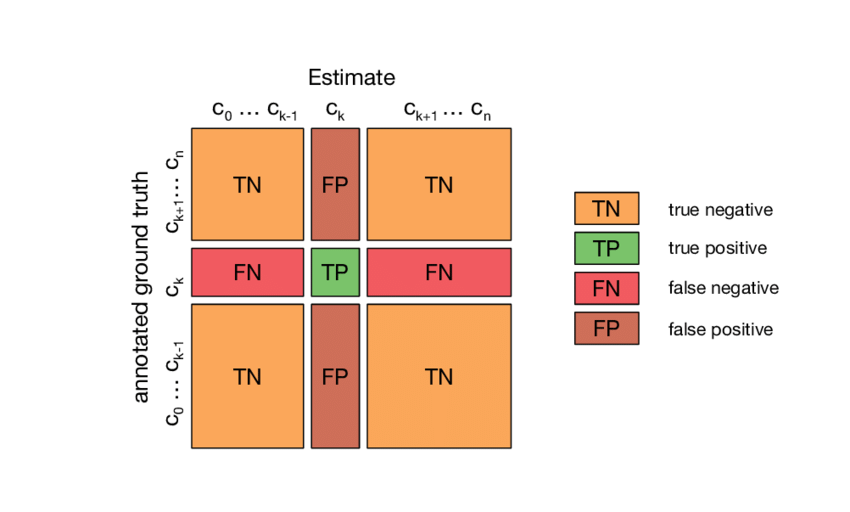

### classification_report

In [ ]:
print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d,))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      1000
           1       0.79      0.62      0.69      1000
           2       0.58      0.35      0.44      1000
           3       0.45      0.36      0.40      1000
           4       0.52      0.55      0.53      1000
           5       0.50      0.48      0.49      1000
           6       0.65      0.71      0.68      1000
           7       0.61      0.69      0.65      1000
           8       0.69      0.76      0.73      1000
           9       0.53      0.81      0.64      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



#### loss-accuracy

1. สร้าง plt.figure
2. ax = add_subplot(row, col, index)
2. ax.plot(เหี้ยไรก็ได้ที่ต้องการ)

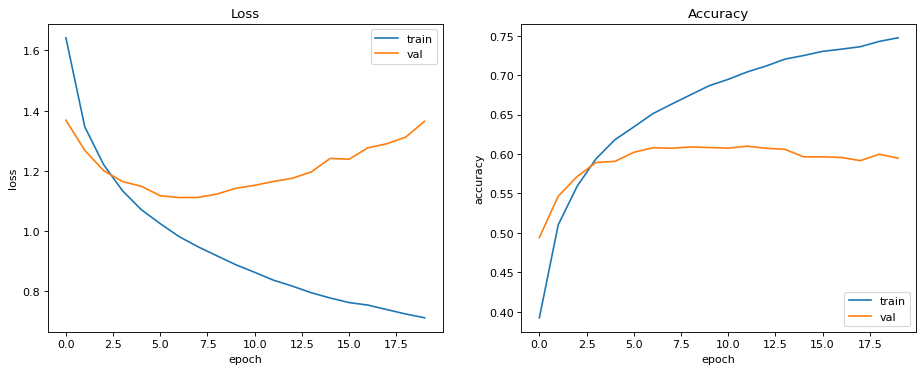

In [ ]:
fig = plt.figure(figsize=(14, 5), dpi=80)
ax = fig.add_subplot(1, 2, 1)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='lower right')